# Pymaceuticals Inc.
---

### Analysis

- Capomulin shows to decrease in tumor volume the longer the treatment timeframe.
- It looks like Mouse B128 is showing a benefit from the treatment of Capomulin. 
- It seems the majority of the mouse were being treated Capomulin and Ramicane. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"],keep=False)]
mouseid = dup["Mouse ID"].unique()
mouseid


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse = combined_data[combined_data['Mouse ID'] == mouseid[0]]
mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Checking the number of mice in the clean DataFrame.

clean = combined_data[combined_data['Mouse ID'] != mouseid[0]]
clean["Mouse ID"].nunique()



248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
avg = clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stdev = clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_statistics = pd.DataFrame({"Mean Tumor Volume":avg,"Median Tumor Volume":median,
                                  "Tumor Volume Variance":variance,"Tumor Volume Std. Dev":stdev,
                                 "Tumor Volume Std. Err.":sem})

summary_statistics




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summ = clean.groupby("Drug Regimen")
sumer = summ[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
sumer

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
summ = clean.groupby("Drug Regimen")
sumer = summ[["Timepoint"]].agg("count")
sumer = sumer.sort_values("Timepoint", ascending=False)
#sumer = sumer.reset_index()
sumer

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


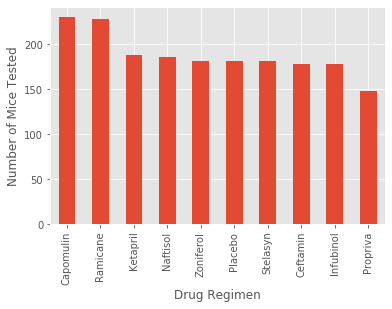

In [33]:

ax = sumer["Timepoint"].plot.bar()
ax.set_xlabel("Drug Regimen", fontsize=12)
ax.set_ylabel("Number of Mice Tested", fontsize=12)
plt.show()

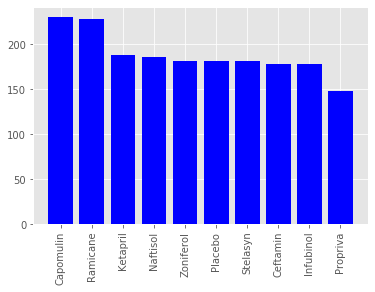

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

sumer2 = sumer.reset_index()
timepoints = sumer2["Timepoint"].tolist()
labels = sumer2['Drug Regimen'].tolist()
x_axis = np.arange(len(timepoints))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels,rotation=90)
ax.set_xlabel("Drug Regimen", fontsize=12)
ax.set_ylabel("Number of Mice Tested", fontsize=12)

plt.bar(x_axis, timepoints, color="b", align="center")
plt.show()

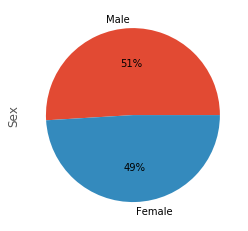

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

summ = clean.groupby("Sex")
sumer = summ[["Timepoint"]].agg("count")
sumer = sumer.sort_values("Timepoint", ascending=False)
sumer = sumer.reset_index()
labels = sumer["Sex"].tolist()
ax = sumer["Timepoint"].plot(kind='pie',labels=labels,autopct='%1.0f%%')
ax.set_ylabel("Sex", fontsize=12)
plt.show()

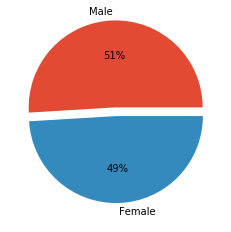

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = sumer["Sex"].tolist()
explode = (.1,0)
plt.pie(sumer["Timepoint"],explode=explode,labels=labels,autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

FourTreatment= combined_data.loc[(combined_data["Drug Regimen"]=="Capomulin")|(combined_data["Drug Regimen"]=="Ramicane") | 
                   (combined_data["Drug Regimen"]=="Infubinol")|(combined_data["Drug Regimen"]=="Ceftamin")]
mx = FourTreatment.groupby("Mouse ID",as_index=False)
mx = mx[["Tumor Volume (mm3)"]].agg("max")   
mx.reset_index()
mx = mx[["Mouse ID","Tumor Volume (mm3)"]]
mx
 # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
DataWithMaxVol = pd.merge(FourTreatment, mx, how="left", on=["Mouse ID", "Mouse ID"])  
DataWithMaxVol = DataWithMaxVol.rename(columns={"Tumor Volume (mm3)_y":"Max Tumor Vol"})
DataWithMaxVol

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Tumor Vol
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.651331
1,c326,0,45.000000,0,Infubinol,Female,18,25,45.000000
2,c139,0,45.000000,0,Infubinol,Male,11,28,72.226731
3,v339,0,45.000000,0,Infubinol,Male,20,26,46.250112
4,a577,0,45.000000,0,Infubinol,Female,6,25,57.031862
...,...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17,46.910892
810,i177,45,33.562402,3,Ramicane,Male,10,18,45.000000
811,r944,45,41.581521,2,Capomulin,Male,12,25,47.373423
812,u364,45,31.023923,3,Capomulin,Male,18,17,47.212200


In [61]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = DataWithMaxVol["Drug Regimen"].unique()
Treatments
plotLabels= [drug for drug in Treatments]
plotLabels
# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []


    

In [90]:



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
DataWithMaxVol.describe()
DataWithMaxVol.reset_index()

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in plotLabels:
    tumorVol.append(DataWithMaxVol['Tumor Volume (mm3)_x'])
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    #iqr
    # Select the first quantile
q1 = DataWithMaxVol['Tumor Volume (mm3)_x'].quantile(.25)

# Select the third quantile
q3 = DataWithMaxVol['Tumor Volume (mm3)_x'].quantile(.75)

# Create a mask inbeetween q1 & q3
mask = DataWithMaxVol['Tumor Volume (mm3)_x'].between(q1, q3, inclusive=True)

# Filtering the initial dataframe with a mask
iqr = DataWithMaxVol.loc[mask, 'Tumor Volume (mm3)_x']
OutLiers = DataWithMaxVol.loc[(DataWithMaxVol['Tumor Volume (mm3)_x'] > q3) | (DataWithMaxVol['Tumor Volume (mm3)_x'] < q1)]    
OutLiers = OutLiers[["Drug Regimen","Tumor Volume (mm3)_x"]]
OutLiers

,Drug Regimen,Tumor Volume (mm3)_x
116,Capomulin,39.202129
134,Capomulin,38.796474
152,Ramicane,38.723707
154,Infubinol,36.321346
166,Ramicane,38.711872
...,...,...
807,Ramicane,37.225650
809,Ramicane,32.978522
810,Ramicane,33.562402
812,Capomulin,31.023923


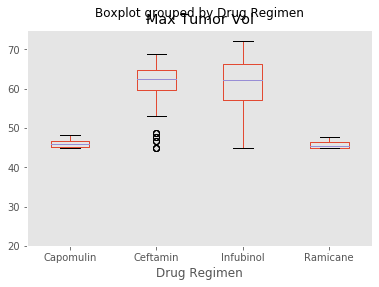

In [86]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

DataWithMaxVol.boxplot(by ='Drug Regimen', column =['Max Tumor Vol'], grid = False)
plt.ylim(20,75)

plt.show()

## Line and Scatter Plots

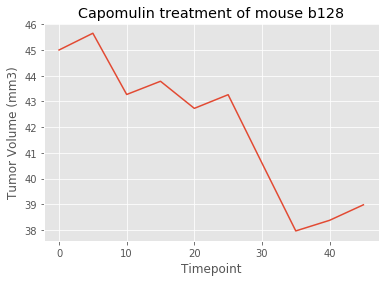

In [87]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

ms = DataWithMaxVol.loc[DataWithMaxVol["Drug Regimen"]=="Capomulin"]
ms = ms.iloc[:1]
ms = ms['Mouse ID']
ms = ms.to_string(index=False).strip()
#ms

#ms = ms.to_string()
#ms

pt = DataWithMaxVol.loc[(DataWithMaxVol["Drug Regimen"]=="Capomulin") &(DataWithMaxVol["Mouse ID"]==ms)  ]
pt = pt[["Tumor Volume (mm3)_x","Timepoint"]]
pt.plot('Timepoint','Tumor Volume (mm3)_x', title = f"Capomulin treatment of mouse {ms}", legend=False)
plt.ylabel('Tumor Volume (mm3)')
plt.show()


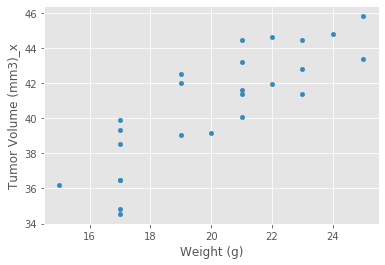

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
wgt = DataWithMaxVol.loc[DataWithMaxVol["Drug Regimen"]=="Capomulin"]
wgt = wgt.groupby("Mouse ID")
wgt = wgt[["Tumor Volume (mm3)_x","Weight (g)"]].agg("mean")
#wgt
wgt.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)_x")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


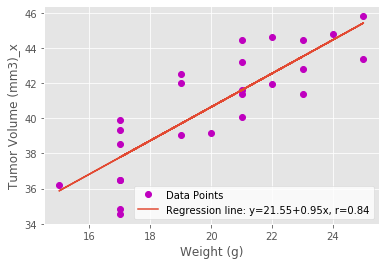

In [89]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.style.use('ggplot')
x = wgt["Weight (g)"]
y = wgt["Tumor Volume (mm3)_x"]
t = st.pearsonr(x, y) [0]
t = np.round_(t,decimals = 2)
slope, intercept, r, p, stderr = st.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker= 'o', color = 'm' , label='Data Points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)_x')
ax.legend(facecolor='white')
print(f'The correlation between mouse weight and the average tumor volume is {t}')
plt.show()